In [1]:
baby <- read.csv("../Data/R_Baby_Names_1880-2014.csv")
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [2]:
tail(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [3]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : Factor w/ 93889 levels "Aaban","Aabha",..: 58869 5842 27035 26291 61544 57699 34165 3261 10695 75005 ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : Factor w/ 135 levels "01/01/1880 12:00:00 AM",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [4]:
head(baby)

# 의미 없이 차지하는 데이터 01/01 12:00:00AM

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [2]:
# baby의 Year부분 정리하기 
baby$Year<-substr(baby$Year, 7, 10)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [6]:
# 저장하여 File 크기 비교
# row.names =F -> 꼭 써야하는 부분이다. 
write.csv(baby, "../Data/baby.csv", row.names =F)

In [7]:
# 72.8MB ->50.9MB로 정제되었다. 
tail(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,2014,13972
1825384,Zykeem,M,5,2014,13973
1825385,Zymeer,M,5,2014,13974
1825386,Zymiere,M,5,2014,13975
1825387,Zyran,M,5,2014,13976
1825388,Zyrin,M,5,2014,13977


In [3]:
# baby에서 여자아이만 Female라는 Dataset을 만들고 row수 구하기...
# subset(election, 광역시도 =='서울특별시')
Female <- subset(baby, Gender == 'F')
nrow(Female)

head(Female)

[1] 1081660

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [9]:
# 여자 아이 이름 종류 및 개수 계산
# Vector의 개수는 length 이니까 
length(unique(Female$Name))

[1] 64911

In [4]:
# 가장 많이 사용된 이름 찾기 
# 1) 이름 별 Count의 합계
femaleName <- aggregate(Count ~ Name, Female, sum)
head(femaleName)

Name,Count
Aabha,21
Aabriella,10
Aaden,5
Aadhira,29
Aadhya,639
Aadi,16


In [5]:
# arrange 쓰고 싶으면 
library(dplyr)

ERROR: Error in library(dplyr): there is no package called ‘dplyr’


In [12]:
# 2) Count 기준으로 내림차순 정렬하기
head(arrange(femaleName, desc(Count)),20)

Name,Count
Mary,4115282
Elizabeth,1601128
Patricia,1570567
Jennifer,1462742
Linda,1450843
Barbara,1432944
Margaret,1240006
Susan,1120469
Dorothy,1105680
Sarah,1060643


In [6]:
# baby에서 남자아이만 Male이라는 dataset만들고 row수 구하기
Male <- subset(baby, Gender == 'M')
nrow(Male)

[1] 743728

In [7]:
# Female에서 Year별로 Count의 합계 
FFemale <- aggregate(Count ~ Year, Female, sum)
head(FFemale)

Year,Count
1880,90993
1881,91954
1882,107850
1883,112321
1884,129022
1885,133055


In [8]:
# Male에서 year별로 Count의 합계를 구한다.
MMale <- aggregate(Count ~ Year, Male, sum)
head(MMale)

Year,Count
1880,110491
1881,100745
1882,113683
1883,104629
1884,114445
1885,107800


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(1, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(1, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(1, ...):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in axis(1, ...):
“PostScript 폰트 데이터베이스에서

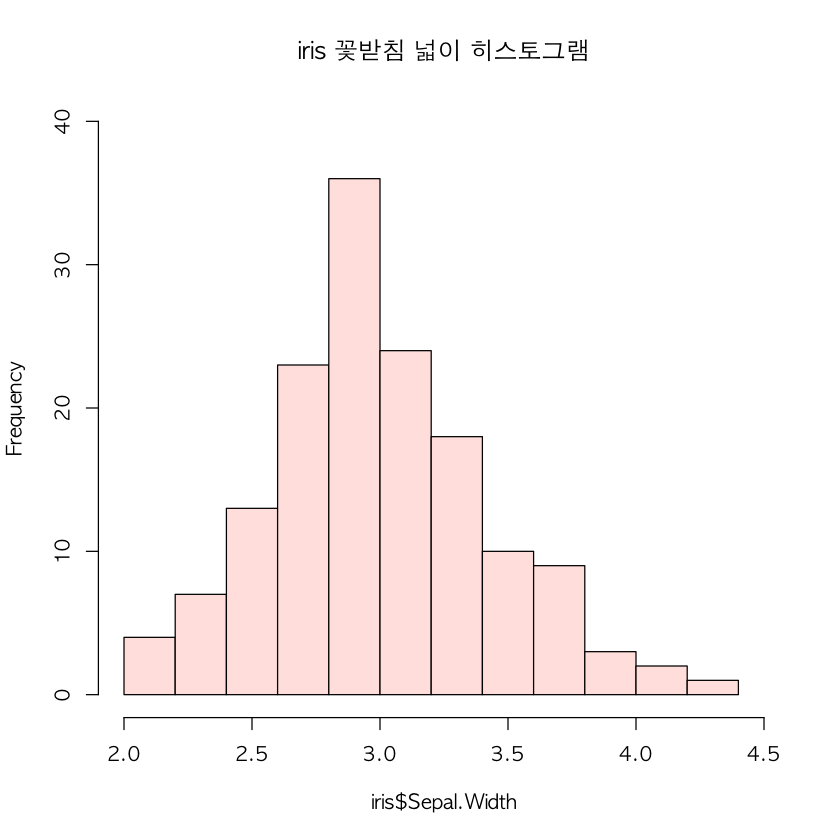

In [9]:
head()

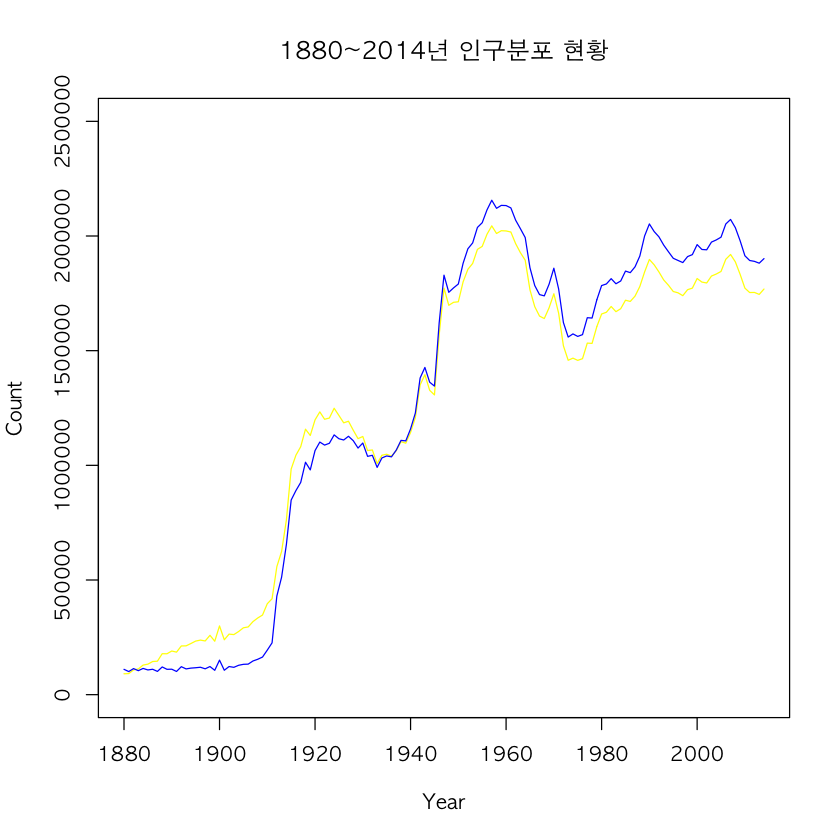

In [33]:
# for mac
options(warn = -1)
par(family = "AppleGothic")

plot(FFemale,
#      type="o",
      ylim = c(0,2500000),
     col = "Yellow",
     type = "l",
#      axes = F, # x,y의 좌표 Frame 제거
     ann = F # x.y의 라벨 제거
#      lty=2
     
     
    )
# x축과 x축의 라벨을 설정
# axis(1,at = 1:5,lab=c("서울","대전","대구","광주","원주"))
# y축과 y축의 라벨을 설정
# axis(2,ylim=c(0,400))

# main title 지정
title(main = '1880~2014년 인구분포 현황')

# x축 title 지정
title(xlab = "Year")
# y축 title 지정
title(ylab = "Count")
# lines 는 plot 위에 같이 쓸 수 있다.
#def
lines(MMale,
       type="l",
#       pch=22,
      col="blue",
#       lty=2
     )
# # ghi
# lines(ghi,
#       type="o",
#       pch=22,
#       col="blue",
#       lty=2
#      )

# 범례
legend(4,400,
       c("Female","Male"),
       
       col = c("Yellow","blue"),
       pch = c(21,22),
       lty = c(1,2),
       cex = 0.7 # 범례 크기
      )

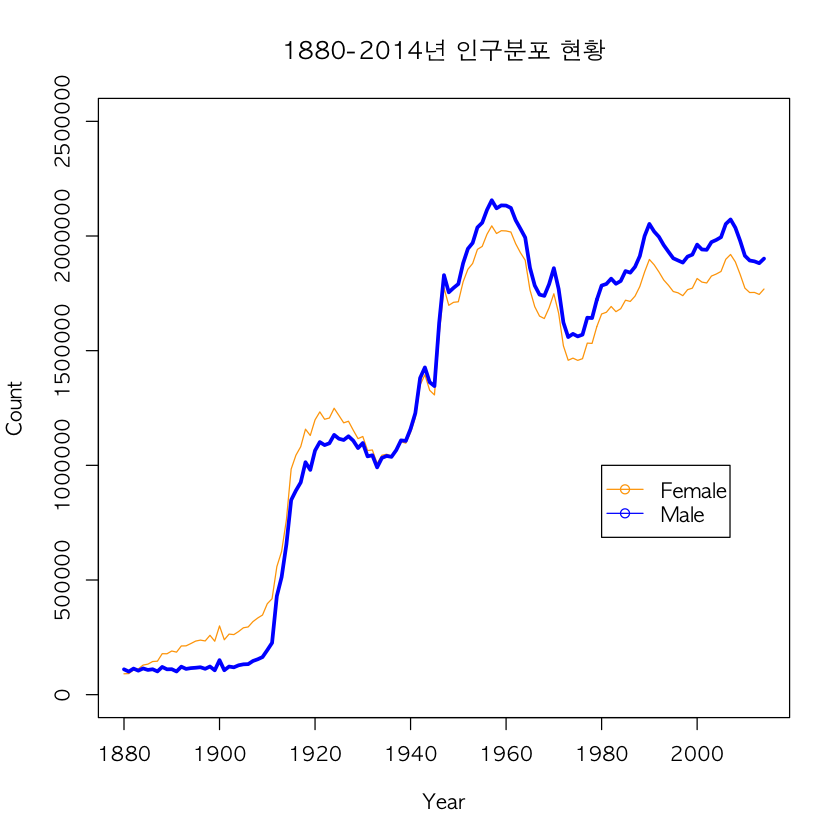

In [59]:
# for mac
options(warn = -1)
par(family = "AppleGothic")

# 선그래프 그리기
plot(FFemale,
     main = "1880-2014년 인구분포 현황",
     type = "l",
     col = "orange",
     ylim = c(0,2500000)
     
    )
lines(MMale,
      col = "blue",
      lwd = "3"
        
     )
# legend(1980,10000000,
#        c("Female","Male"),
#        fill = c("orange","blue"),
# #        col = c("orange","blue"),
#        lty = 1,
#        pch = 21
#       )
legend(1980, 1000000,
       c('Female', 'Male'),
       col = c("orange", "blue"), #필요없음 fill 쓸때
       #fill = c("orange", "blue"),
       lty = 1,
       pch = 21
      )

# Data 시각화 2

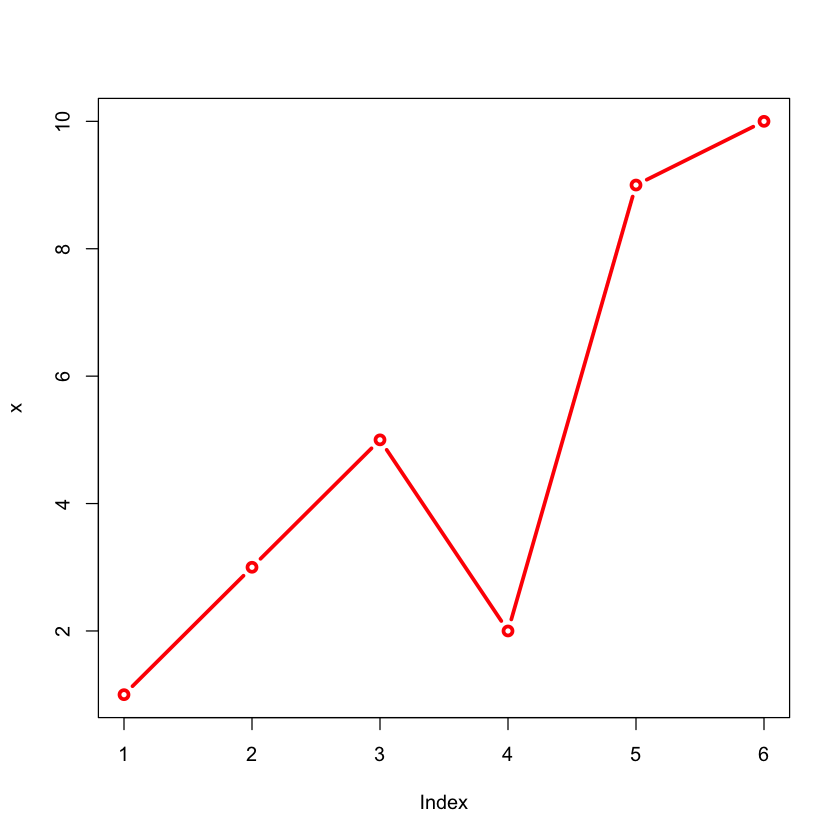

In [57]:
x <- c(1,3,5,2,9,10)
plot(x,
     type = "b",
     col = "red",
     lwd = "3"
    )

### 한 화면에 차트 여러개 그려서 비교하기

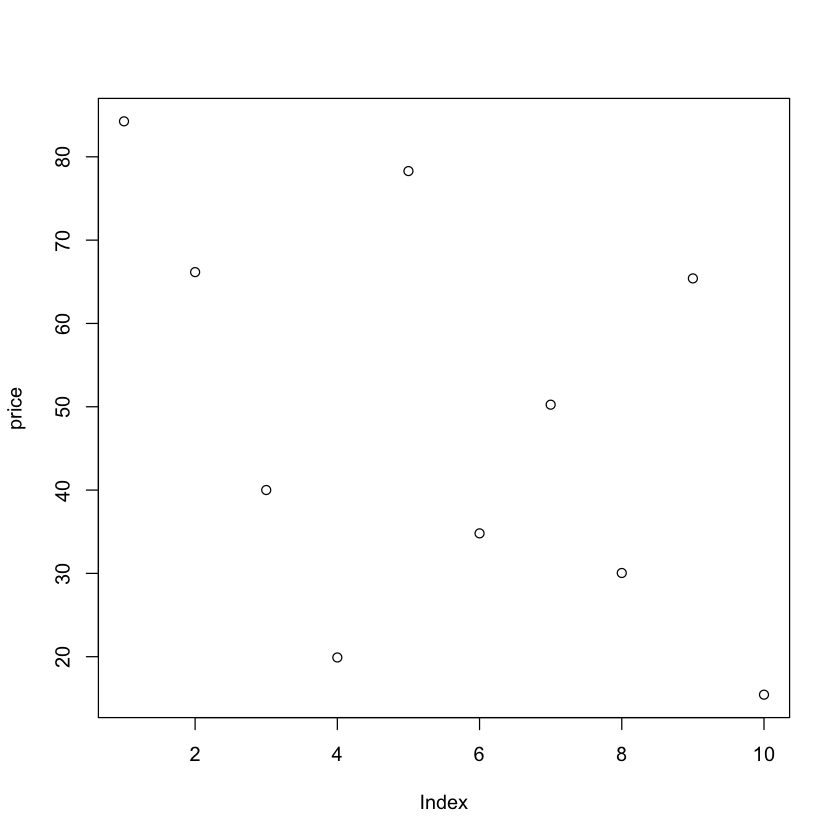

In [67]:
price <- runif(10,1,100)
plot(price)

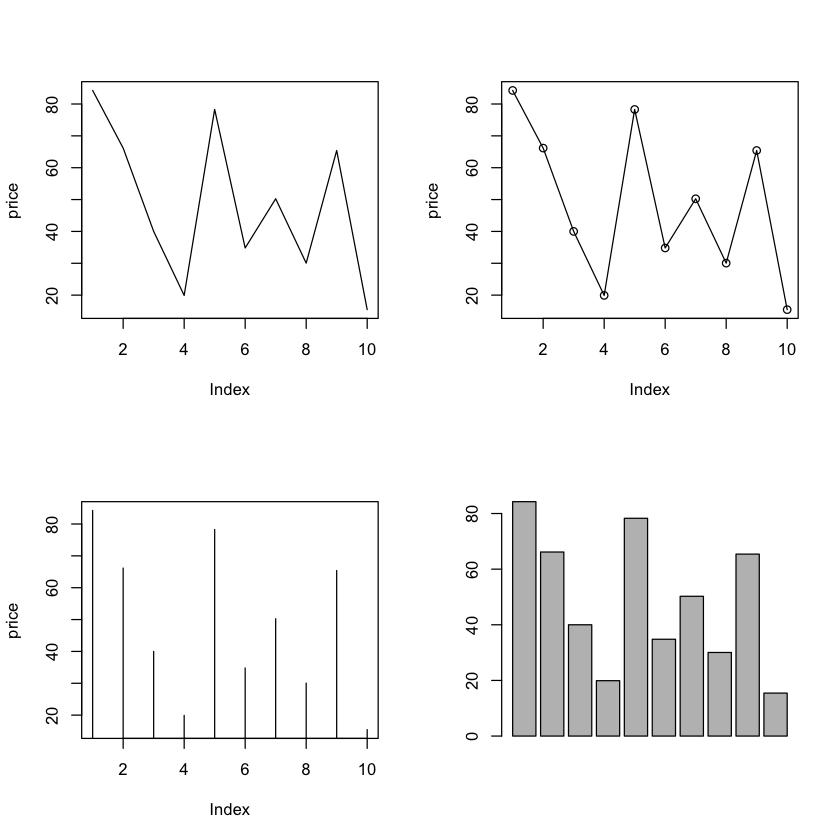

In [76]:
# 2행 2열 차트 그리기 : type 속성으로 비교


par(mfrow = c(2,2)) # 범위를 잡아준다
plot(price, type = "l")
plot(price, type = "o")
plot(price, type = "h")
# plot(price, type = "s")
barplot(price)

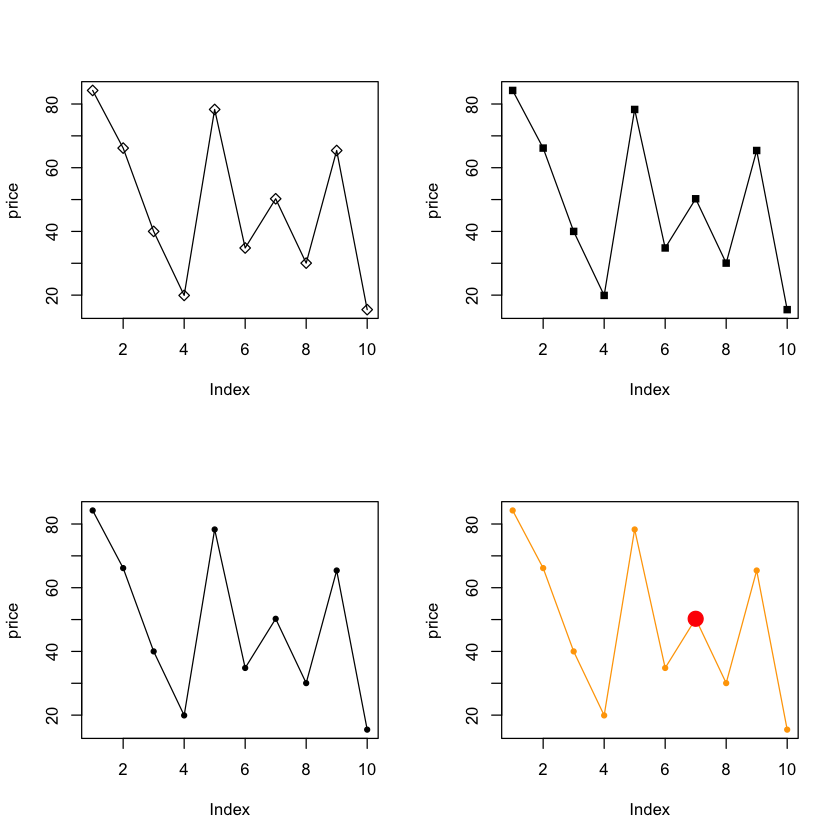

In [87]:
# pch 속성으로 비교
par(mfrow = c(2,2))
plot(price, type = "o",pch = 5)
plot(price, type = "o",pch = 15)
plot(price, type = "o",pch = 20)
plot(price, type = "o",pch = 20,
                      ,col = c(rep("orange",6),"red",rep("orange",3)),
                      ,cex = c(rep(1,6),3,rep(1,3)), #  강조
    )




## 중첩 자료 시각화

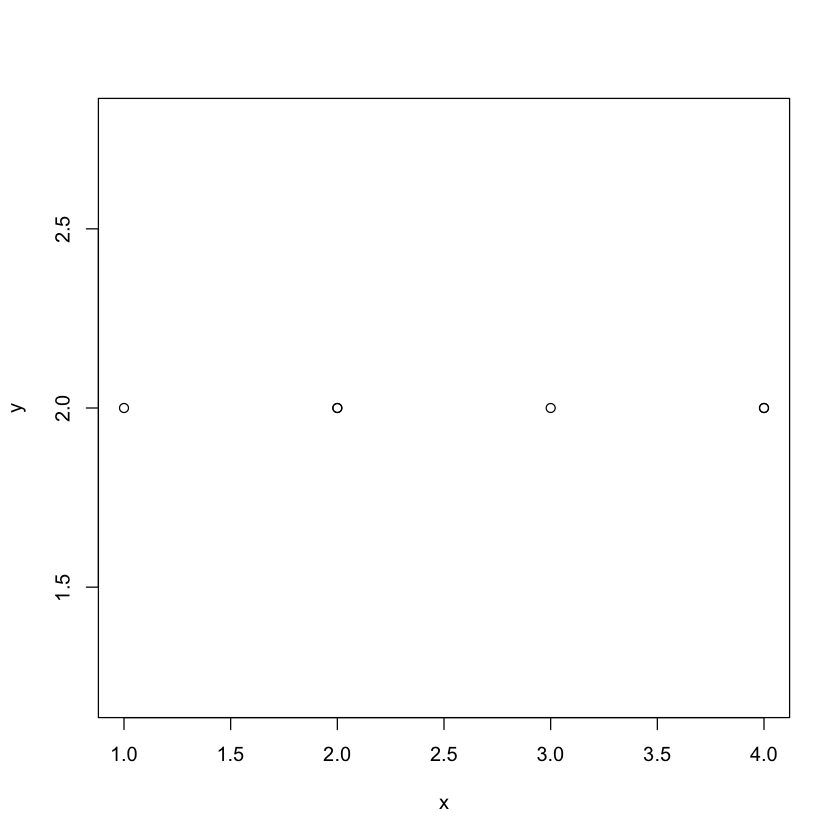

In [88]:
x <- c(1,2,3,4,2,4)
y <- rep(2,6)
plot(x,y)

In [89]:
# Method 1)
table(x,y)

   y
x   2
  1 1
  2 2
  3 1
  4 2

In [91]:
xy.df <- as.data.frame(table(x,y))

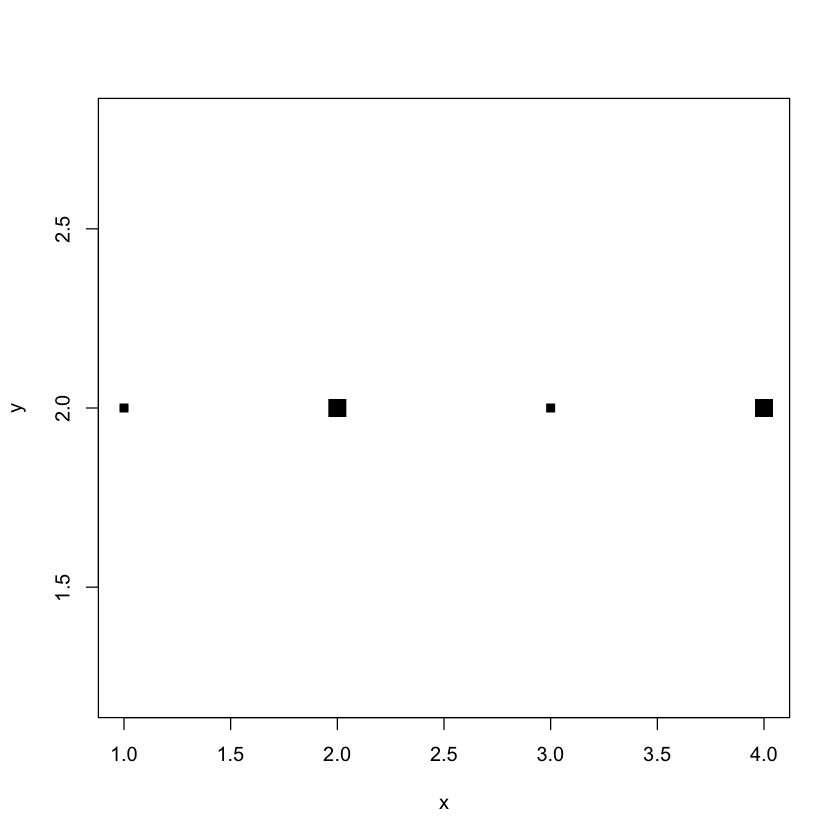

In [93]:
plot(x,y,
     pch = 15,
     cex = xy.df$Freq
    )

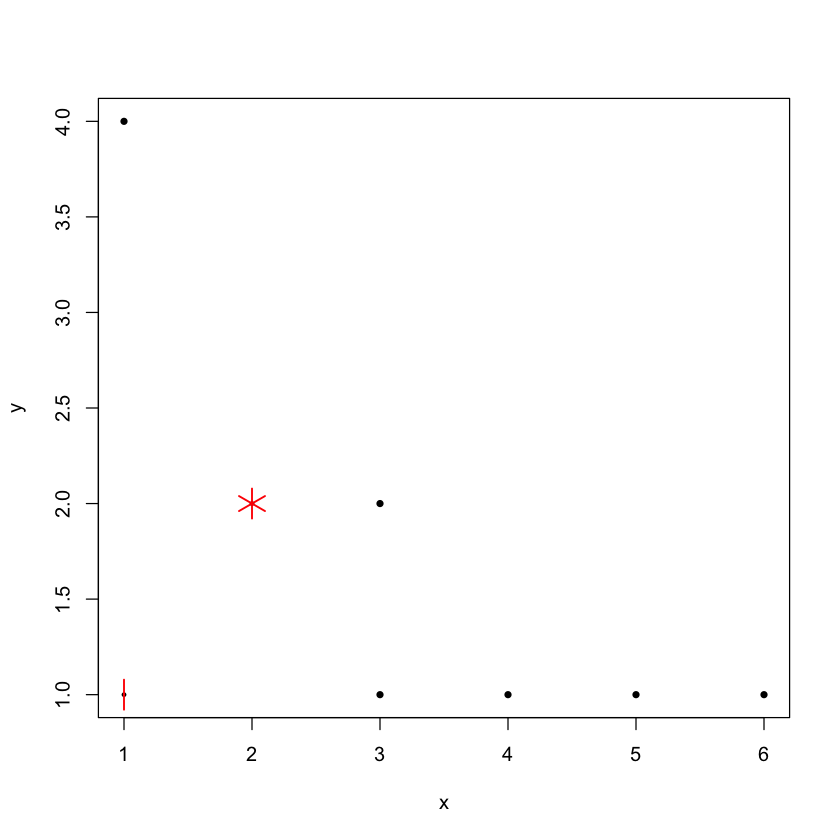

In [99]:
# method 2)
x <- c(1,1,1,2,2,2,2,2,2,3,3,4,5,6)
y <- c(1,1,4,2,2,2,2,2,2,2,1,1,1,1)

z <- data.frame(x,y)
sunflowerplot(x,y)

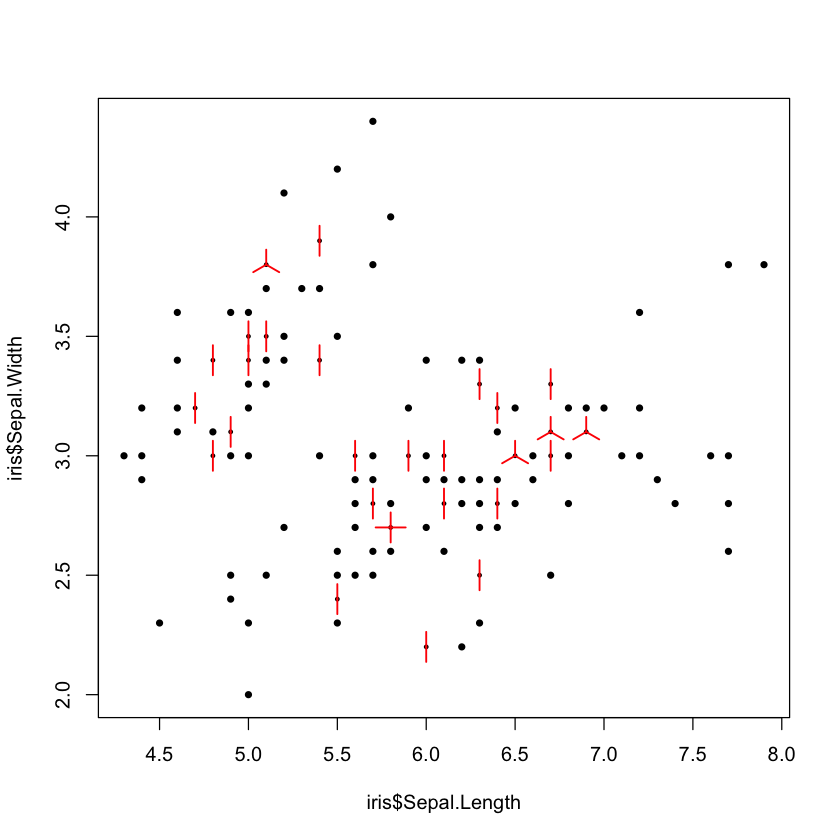

In [101]:
#  iris의 Sepal.Length와 Sepal.Width의 중복 시각화 처리

sunflowerplot(iris$Sepal.Length,iris$Sepal.Width)


### chart 2개를 겹쳐서 출력하기


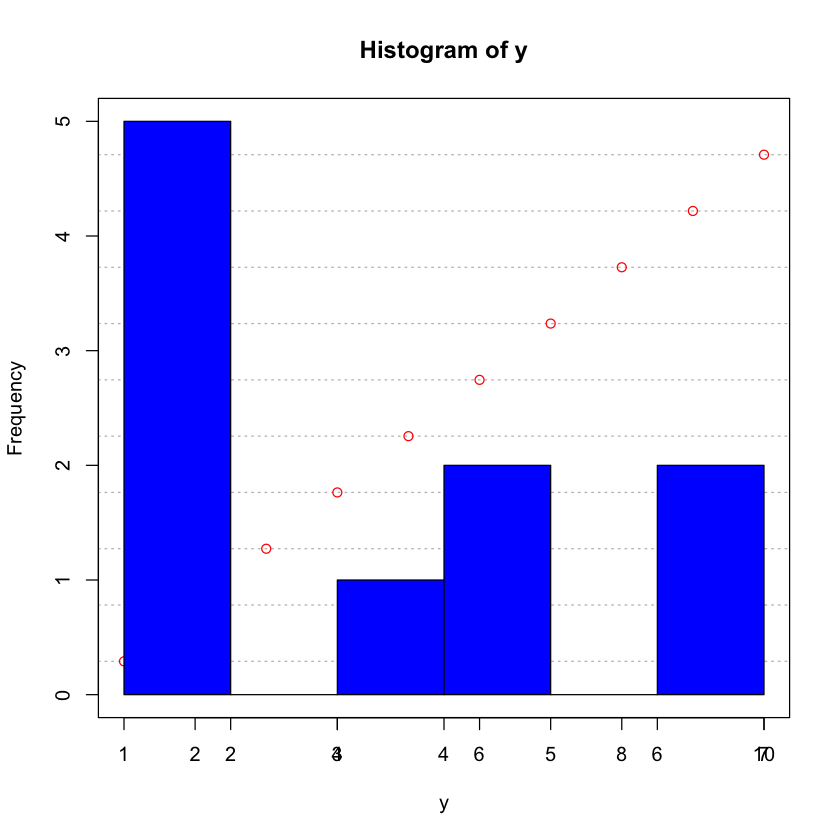

In [104]:
x <- 1:10
dotchart(x, col = "red")

par(new=T)# 현재 chart를 유지하고 다른 차트를 생성한다.

y <- c(1,2,1,4,5,2,7,7,2,5)
hist(y,col="blue")

### 투명도를 추가하기

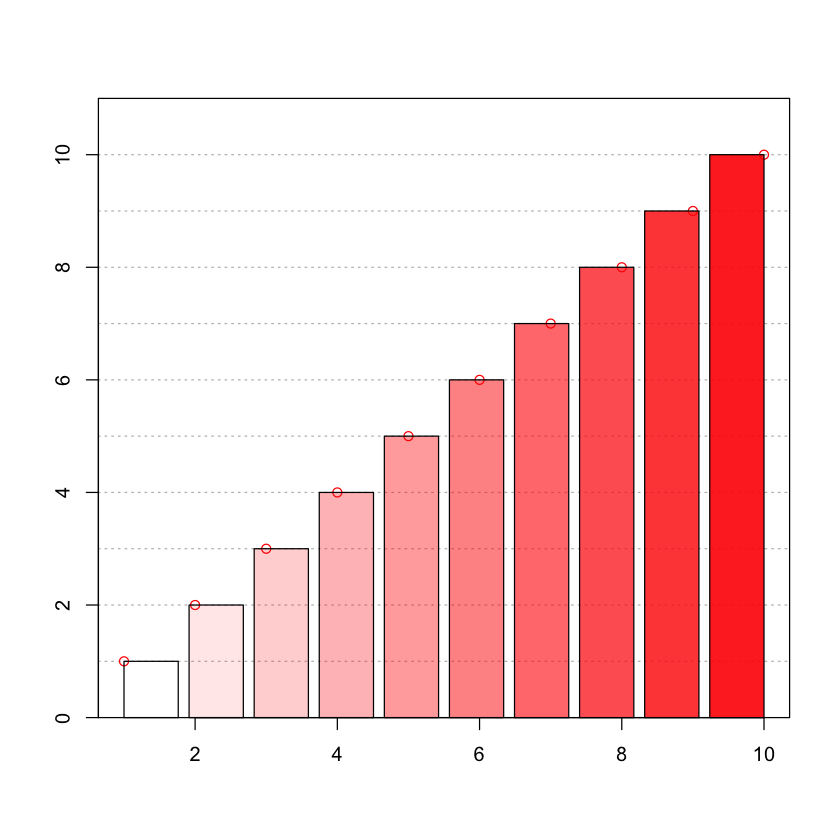

In [113]:
x <- 1:10
dotchart(x,col='red')

par(new=T)

y <- c(1,2,1,4,5,2,7,7,2,5)
mycol <- rgb(1,0,0,seq(0,1,0.1))
barplot(x,
        ylim = c(0,11),
        col = mycol # r,g,b,alpha(투명도)
       )

In [114]:
# 상자 수염 그래프
abc <- c(110,300,150,280,310)


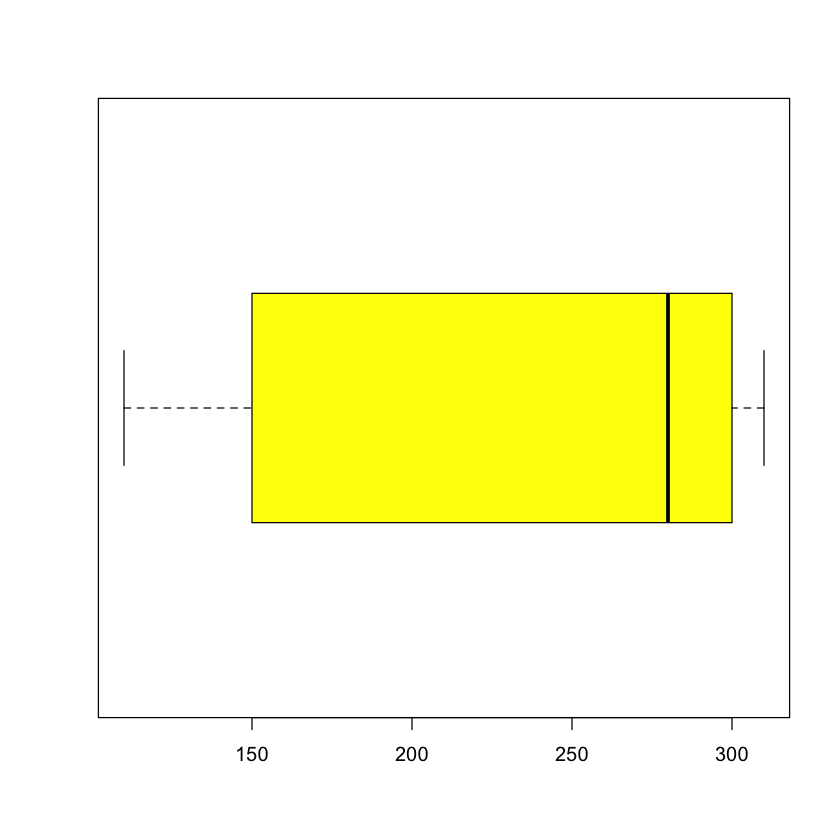

In [118]:
boxplot(abc,
       col = "yellow",
        horizontal = T
       )

In [116]:
def <- c(1,1,1,1,1,1,2,5)
summary(def)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.625   1.250   5.000 

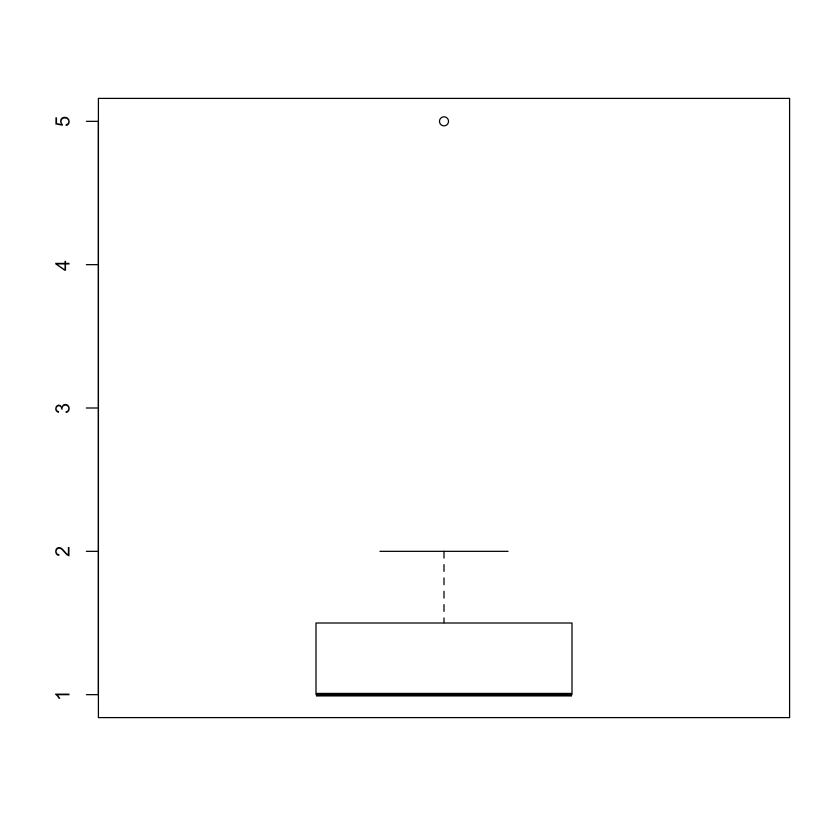

In [117]:
boxplot(def)

In [119]:
# 자동차의 제동거리
data(cars)
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


In [120]:
str(cars)

'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...


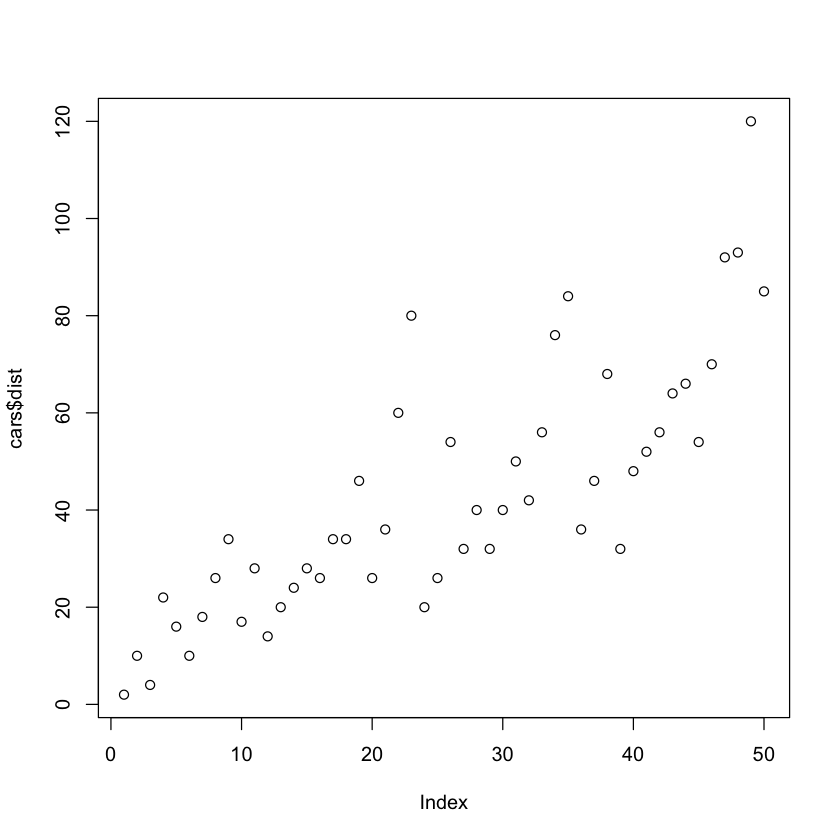

In [122]:
plot(cars$dist)

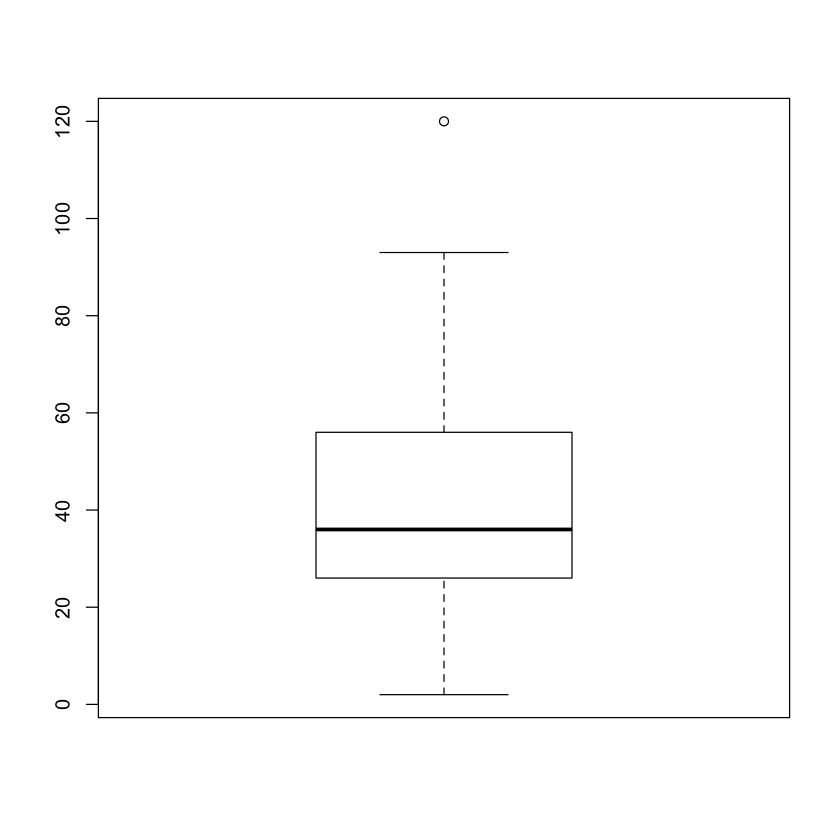

In [123]:
boxplot(cars$dist)

### 기타 그래프

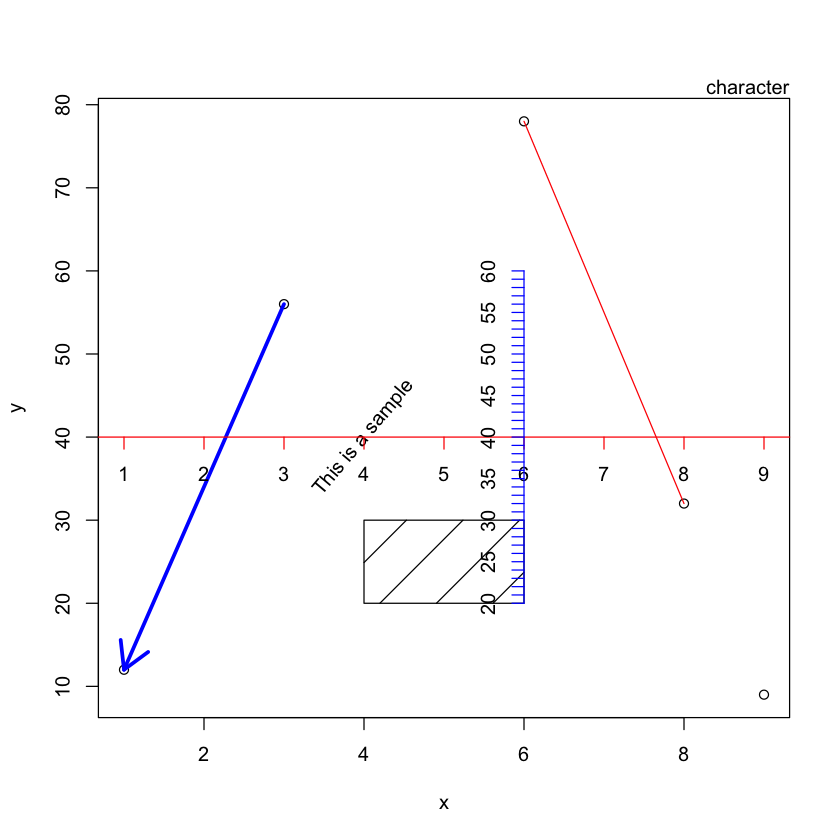

In [149]:
x <- c(1,3,6,8,9)
y <- c(12,56,78,32,9)

plot(x,y)

# (3,3)과 (4,4)를 연결하는 선분 그리기
segments(6,78, 8,32,col="red")

# 화살표 그리기
arrows(3,56, 1,12,col="blue",lwd=3)

# 사각형 그리기
rect(4,20,6,30,density=3)

# 글자쓰기
text(4,40,"This is a sample",srt=50)

# 테두리 활용하기 (adj = 글자 위치)
mtext("character", side = 3, adj = 1)

# x축의 추가, y축의 40 위치에 0~10까지 표시하고 색은 빨간색
axis(1, pos = 40, at = 0:10, col="red")

# y축의 추가, x축의 6위치에 20~60까지 표시하고 색은 파란색
axis(2, pos = 6, at = 20:60, col="blue")

In [3]:
# 투표수 높은 지역의 후보별 득표수
election <- read.csv("../Data/election_result_ansi.csv",fileEncoding = "euc-kr",header = T)

also installing the dependencies ‘ellipsis’, ‘pillar’, ‘glue’, ‘lifecycle’, ‘rlang’, ‘tibble’, ‘tidyselect’, ‘vctrs’

Warning message in install.packages("dplyr", repo = "https://cloud.r-project.org"):
“installation of package ‘glue’ had non-zero exit status”Warning message in install.packages("dplyr", repo = "https://cloud.r-project.org"):
“installation of package ‘rlang’ had non-zero exit status”Warning message in install.packages("dplyr", repo = "https://cloud.r-project.org"):
“installation of package ‘ellipsis’ had non-zero exit status”Warning message in install.packages("dplyr", repo = "https://cloud.r-project.org"):
“installation of package ‘lifecycle’ had non-zero exit status”Warning message in install.packages("dplyr", repo = "https://cloud.r-project.org"):
“installation of package ‘vctrs’ had non-zero exit status”Warning message in install.packages("dplyr", repo = "https://cloud.r-project.org"):
“installation of package ‘pillar’ had non-zero exit status”Warning message in inst

In [7]:
library("dplyr")

In [8]:
# 후보별 광역시별 득표수 구하기
elec_moon<-aggregate(moon ~광역시도,election,sum)
elec_hong<-aggregate(hong ~광역시도,election,sum)
elec_ahn<-aggregate(ahn ~광역시도,election,sum)

In [11]:
# 투표수가 1순위인 지역의 득표수 구하기
elec_sum <- aggregate(pop ~광역시도,election,sum)
top4Area <- arrange(elec_sum, desc(pop))[1:4,1]


top4_1<-
c(subset(elec_moon, 광역시도 == top4Area[1])[1,2],
subset(elec_hong, 광역시도 == top4Area[1])[1,2],
subset(elec_ahn, 광역시도 == top4Area[1])[1,2])

In [12]:
# 투표수가 2순위인 지역의 득표수 구하기
top4_2<-
c(subset(elec_moon, 광역시도 == top4Area[2])[1,2],
subset(elec_hong, 광역시도 == top4Area[2])[1,2],
subset(elec_ahn, 광역시도 == top4Area[2])[1,2])

In [13]:
# 투표수가 3순위인 지역의 득표수 구하기
top4_3<-
c(subset(elec_moon, 광역시도 == top4Area[3])[1,2],
subset(elec_hong, 광역시도 == top4Area[3])[1,2],
subset(elec_ahn, 광역시도 == top4Area[3])[1,2])

In [14]:
# 투표수가 4순위인 지역의 득표수 구하기
top4_4<-
c(subset(elec_moon, 광역시도 == top4Area[4])[1,2],
subset(elec_hong, 광역시도 == top4Area[4])[1,2],
subset(elec_ahn, 광역시도 == top4Area[4])[1,2])

In [15]:
top4 <- cbind(top4_1,top4_2,top4_3,top4_4)
top4

top4_1,top4_2,top4_3,top4_4
3319812,2781345,872127,779731
1637345,1365285,720484,790491
1807308,1492767,378907,284272


In [16]:
# 컬럼이름과 row 이름 정리
colnames(top4) <- top4Area

In [17]:
rownames(top4) <- c('문재인','홍준표','안철수')
top4

,경기도,서울특별시,부산광역시,경상남도
문재인,3319812,2781345,872127,779731
홍준표,1637345,1365285,720484,790491
안철수,1807308,1492767,378907,284272


In [18]:
# 투표수 높은 지역의 후보별 투표수 5군데
elec_top5 <- head(arrange(election, desc(pop)), 5)
elec_top5_matrix <- t(elec_top5[,5:7])
elec_top5_matrix

,1,2,3,4,5
moon,239697,177328,165079,175882,176940
hong,100544,98549,86026,76601,69014
ahn,128297,99018,92048,88128,84967


In [19]:
rownames(elec_top5_matrix) <- c("문재인", "홍준표", "안철수")
colnames(elec_top5_matrix) <- paste(elec_top5$광역시도, elec_top5$시군)
elec_top5_matrix

,경기도 부천시,서울특별시 송파구,경기도 남양주시,서울특별시 강서구,경기도 화성시
문재인,239697,177328,165079,175882,176940
홍준표,100544,98549,86026,76601,69014
안철수,128297,99018,92048,88128,84967


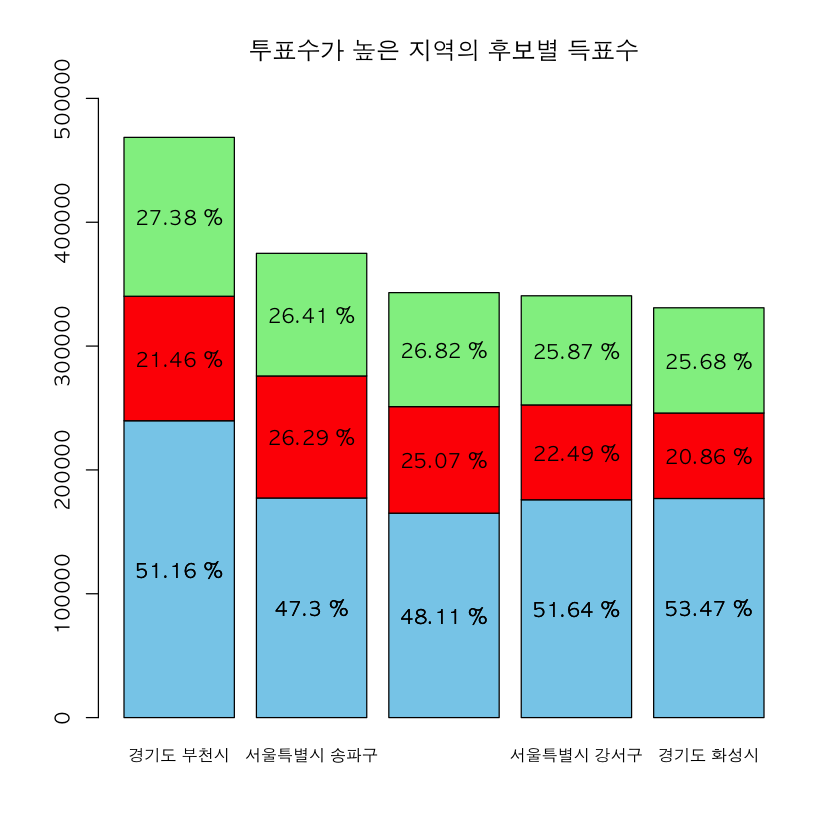

In [162]:
options(warn = -1)
par(family = "AppleGothic")
options(scipen = 100) #지수 지우기

barplot(elec_top5_matrix,
       main = "투표수가 높은 지역의 후보별 득표수",
       ylim = c(0, 500000),
        cex.names = 0.8,
        legned.text = T,
        col = c("sky blue", "red", "light green")
       )
# 글자쓰기
# text(4,40,"This is a sample",srt=50)

# count = c(0,0,0,0,0)

# for (i in 1:5){
#     count[i] = 0.7 + ((i-1)*1.2)
#     cat(count[i],"\n")   
# }






# for (i in 1:5){
#     text(0.7+((i-1)*1.2),sum(elec_top5[i,5:7])+10000,sum(elec_top5[i,5:7]))
# }
# for (j in 5:7){
#     for(i in 1:5){
        
#         text(0.7+((i-1)*1.2),(elec_top5[i,5:j])/2,round(elec_top5[i,5]/sum(elec_top5[i,5:7]) * 100))
#     }
# }



for (j in (1:5)){
    text(0.7+((j-1)*1.2),sum(elec_top5[j,5])/2,paste(round(elec_top5[j,5]/sum(elec_top5[j,5:7]) * 100,2),"%"))
    for (i in 5:6){
        text(0.7+((j-1)*1.2),sum(elec_top5[j,5:i])+(elec_top5[j,i+1]/2),paste(round(elec_top5[j,i+1]/sum(elec_top5[j,5:7]) * 100,2),"%"))
    }
}








In [149]:
elec_top5

X,광역시도,시군,pop,moon,hong,ahn
85,경기도,부천시,543777,239697,100544,128297
23,서울특별시,송파구,441198,177328,98549,99018
98,경기도,남양주시,397972,165079,86026,92048
15,서울특별시,강서구,397108,175882,76601,88128
100,경기도,화성시,386002,176940,69014,84967


In [163]:
# 투표수 높은 지역의 후보별 득표수

In [166]:
# library(ggplot2)

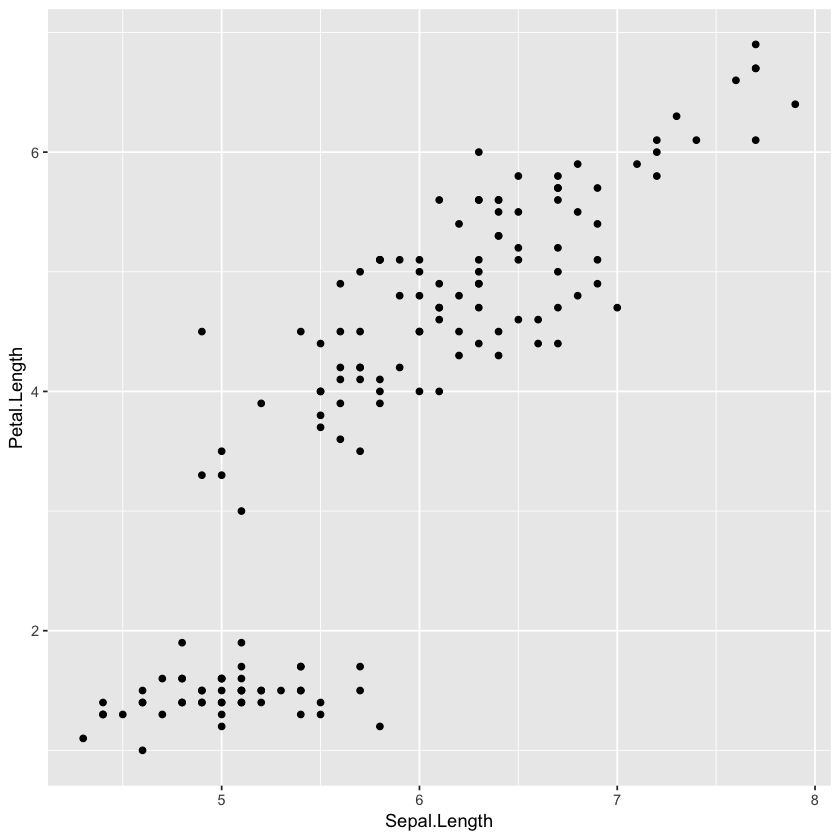

In [165]:
qplot(Sepal.Length, Petal.Length, data=iris)

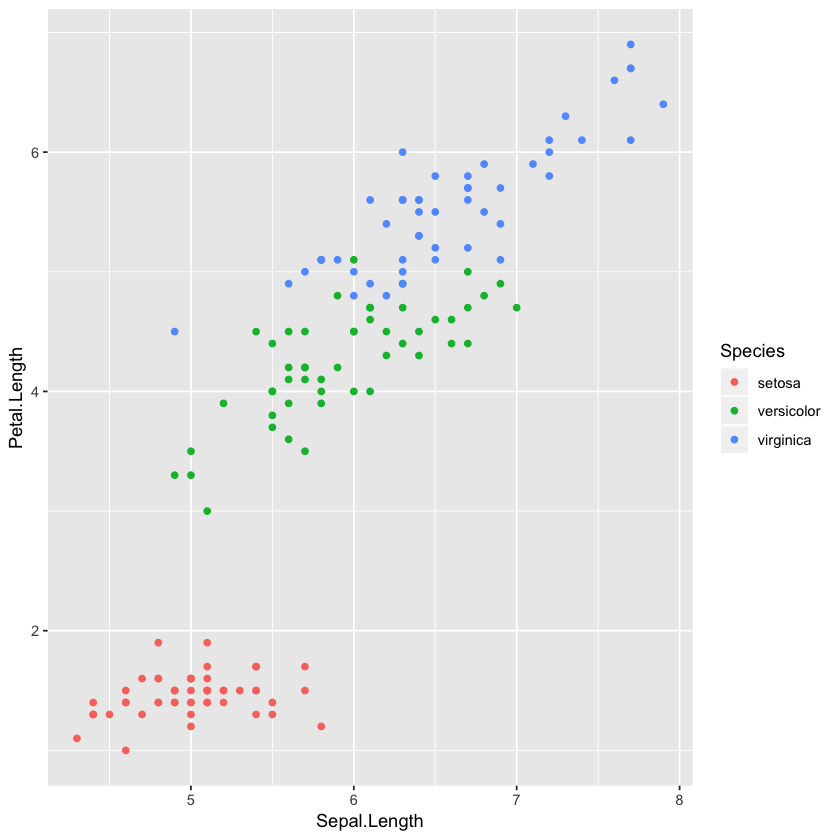

In [167]:
qplot(Sepal.Length, Petal.Length, data=iris, col=Species)

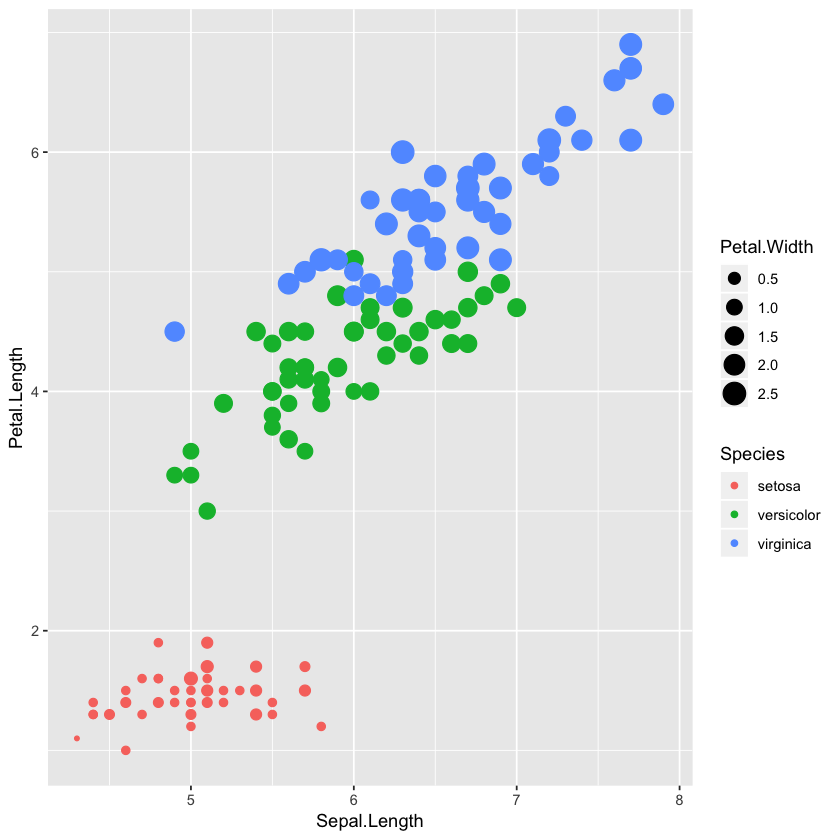

In [168]:
qplot(Sepal.Length, Petal.Length, data = iris, col = Species, size = Petal.Width)

# 수학 함수의 시각화

y = x^2

In [170]:
f <- function(x){
    y = x ^ 2
    return (y)
}

In [172]:
x <- 1:3
f(x)

[1] 1 4 9

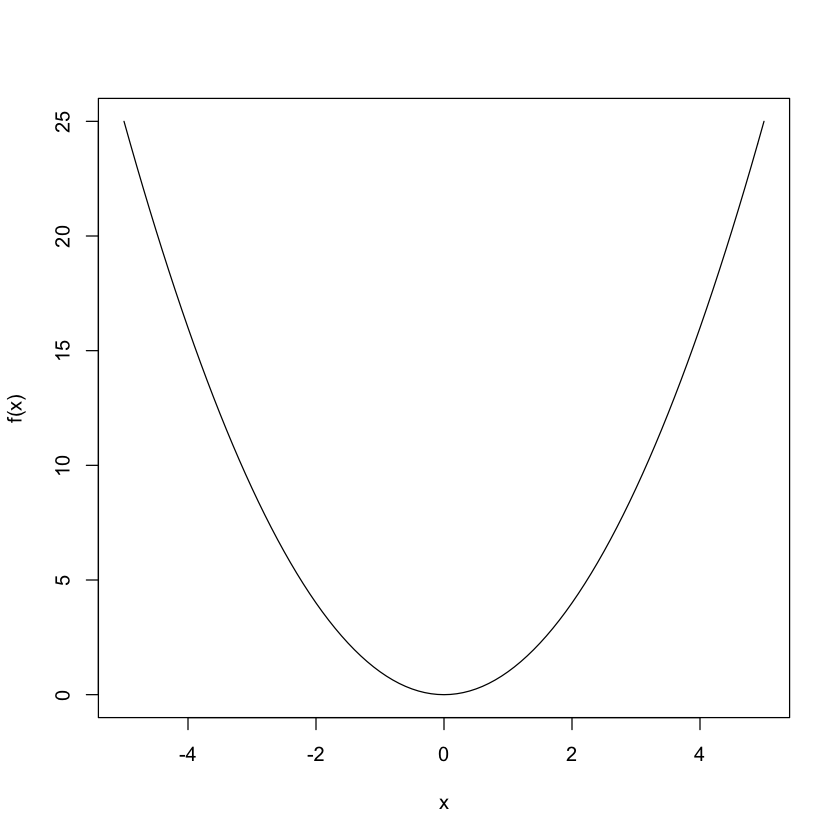

In [175]:
x <- seq(-5,5,0.1)
plot(x,f(x), type = "l")

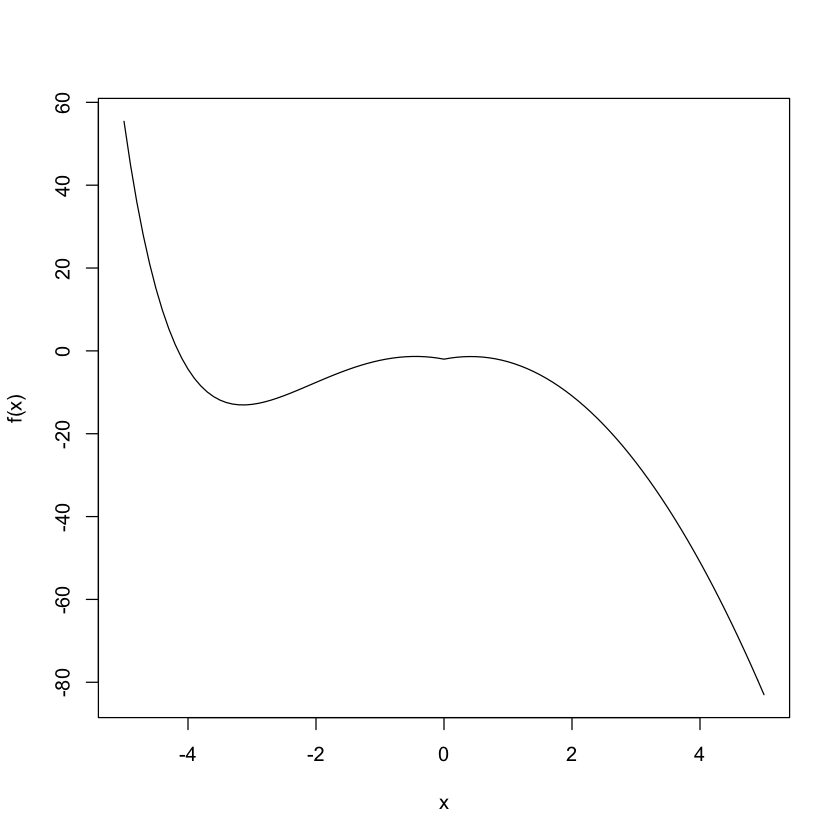

In [176]:
# y = e^(-x) - 4x^2 + x + 3|x| - 3
f <- function(x){
    y = exp(-x) - 4 * x ^ 2 + x + 3 * abs(x) - 3
    return (y)
}
plot(x,f(x),type="l")

In [182]:
# y = x ^ 2 + 2x + 3

f <- function(x){
    y = x^2 + 2*x + 3
    return (y)
}

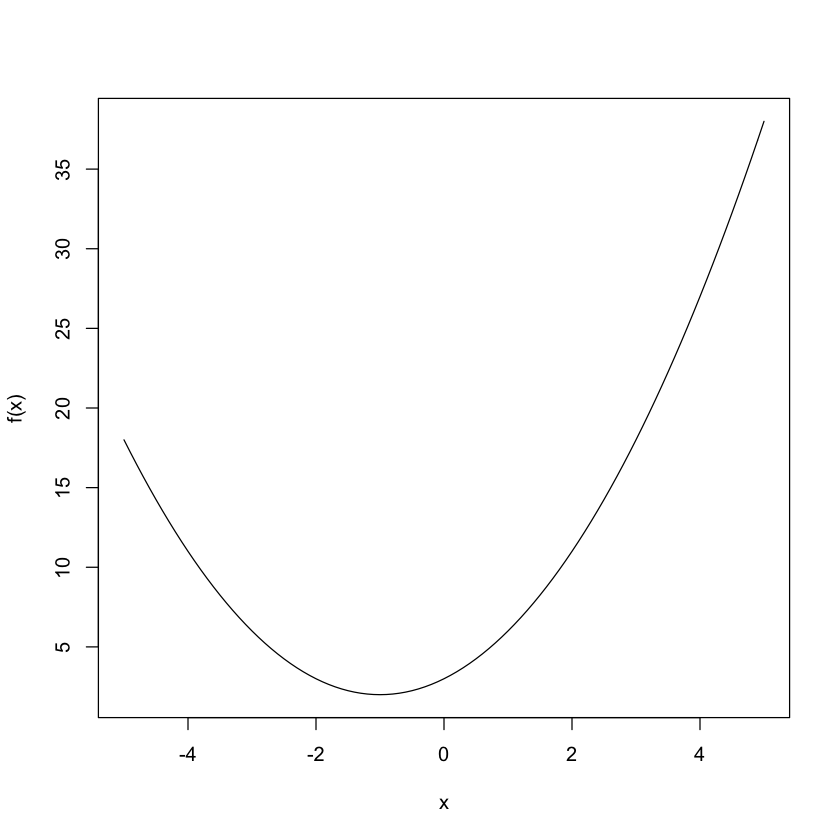

In [183]:
plot(x,f(x),type="l")

# 기초 통계랑 산출

In [186]:
cafe <- read.csv("../Data/coffee.csv")
head(cafe)

seq,Day.Code,Day.of.Week,Coffee,Fruit.Cup
1,1,Mon,3,1
2,2,Tue,8,0
3,3,Wed,11,0
4,4,Thu,24,0
5,5,Fri,5,5
6,6,Sat,10,0


In [187]:
# 커피 빈도수 구하기
table(cafe$Coffee)


 3  5  8  9 10 11 13 14 18 22 24 25 27 29 33 34 49 50 51 53 54 56 59 
 1  2  1  1  1  2  1  1  1  1  1  1  1  2  1  2  1  2  1  1  1  1  1 

In [193]:
# 범위 빈도수
coffee_Range <- seq(0,60,10) # 범위
table(cut(cafe$Coffee, breaks = coffee_Range))
table(cut(cafe$Coffee, breaks = coffee_Range, right = F))


 (0,10] (10,20] (20,30] (30,40] (40,50] (50,60] 
      6       5       6       3       3       5 


 [0,10) [10,20) [20,30) [30,40) [40,50) [50,60) 
      5       6       6       3       1       7 

In [194]:
# 줄기-잎 그림
stem(cafe$Coffee)


  The decimal point is 1 digit(s) to the right of the |

  0 | 35589
  1 | 011348
  2 | 245799
  3 | 344
  4 | 9
  5 | 0013469



In [207]:
# Coffee의 평균과 표준편차
meanCoffee <- mean(cafe$Coffee)
sdCoffee <- sd(cafe$Coffee)
paste("커피 평균 판매량:",round(meanCoffee,1),"커피 표준편차:", round(sdCoffee,2))

[1] "커피 평균 판매량: 28.1 커피 표준편차: 18.27"

In [206]:
# 주스의 평균과 표준편차
meanFruit.Cup <- mean(cafe$Fruit.Cup)
sdFruit.Cup <- sd(cafe$Fruit.Cup)
paste("주스 평균 판매량:",round(meanFruit.Cup,1),"주스 표준편차:", round(sdFruit.Cup,2))

[1] "주스 평균 판매량: 6.1 주스 표준편차: 6.55"

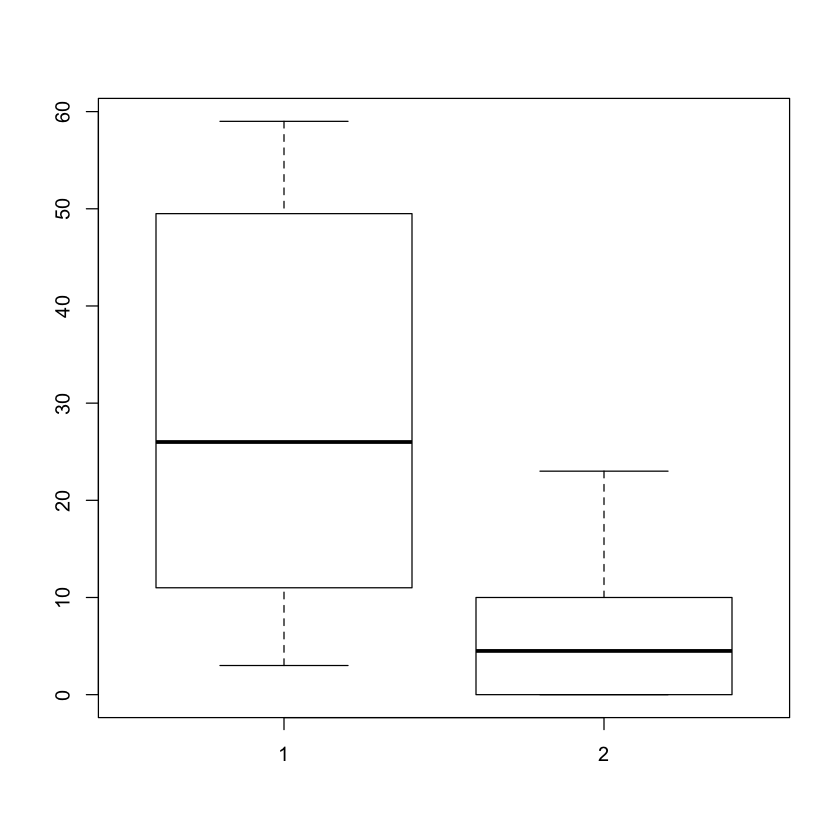

In [211]:
# 변동계수 = 표준편차 / 평균
ca <- sdCoffee/meanCoffee
ju <- sdFruit.Cup/meanFruit.Cup

boxplot(cafe$Coffee,cafe$Fruit.Cup)


# 가설 검정

### 카이제곱 검정
: 두 범주형 변수가 서로 상관이 있는지 판단하는 통계적 검정 방법


### child별 장난감 보유 현황
- 귀무가설 : child1과 child2의 장난감 보유수에 대한 만족도는 차이가 없다.
- 대립가설 : child1과 child2의 장난감 보유수에 대한 만족도의 차이가 있다.




In [213]:
# child별 장난감 보유 현황
child1 <- c(5, 11, 1)
child2 <- c(4,7,3)


In [214]:
Toy <- cbind(child1, child2)
Toy

child1,child2
5,4
11,7
1,3


In [217]:
rownames(Toy) <- c("car","truck","doll")
Toy

,child1,child2
car,5,4
truck,11,7
doll,1,3


In [219]:
# 카이제곱 검정 실시
chisq.test(Toy)


	Pearson's Chi-squared test

data:  Toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론

p-value = 0.4219 > 0.05(유의수준, 95% 신뢰구간) --> 귀무가설 채택

p-value는 0에 가까울수록 좋다, 미리 정해진 유의수준(일반적으로 0.05) 보다 작으면
대립가설을 채택하고, 크면 귀무가설을 채택한다

### 메세지 : 카이제곱의 근사값이 정확하지 않을수도 있다.
데이터량이 적은 경우 발생 --> 피셔검정

In [220]:
fisher.test(Toy)


	Fisher's Exact Test for Count Data

data:  Toy
p-value = 0.5165
alternative hypothesis: two.sided


p-value = 0.5165 > 0.05 --> 귀무가설

In [221]:
cor(child1, child2)

[1] 0.9862414